<a href="https://colab.research.google.com/github/Rowan-Omar/House-Pricing---Data-Analysis/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing missing modules

Those three modules are used to assist in visualizaing geographic info



In [6]:
#pip install basemap

In [7]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\El-Wattaneya\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

In [8]:
#pip install pillow

In [9]:
#pip install basemap-data-hires

# Importing libiraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.basemap import Basemap

%matplotlib inline

# Data Reading



In [120]:
hs = pd.read_csv("kc_house_data.csv")

In [111]:
hs.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


# Data Understanding

There are total 21 columns with 21613 entries (records)

Our target column here is the 'price'.
We think that it will be changed according to:
* #ofBedrooms      (with direct proportional), 
* #ofBathrooms     (direct proportional),
* sqft_living      (direct proportional),
* sqft_lot         (direct proportional),
* view (direct proportional),
* lat & long (direct proportional)

---
sqft_lot (the area of the surrounding land)
<br/>
grade: overall grade given to the housing unit, based on King County grading system
<br/>
waterfront: Whether the house is on a waterfront
<br/>
sqft_living15: Living room area in 2015(implies some renovations)
<br>
view: how good the view of the property was


In [112]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
hs.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
hs.condition

0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21613, dtype: int64

In [16]:
hs['waterfront'].unique()

array([0, 1])

In [17]:
print(hs['view'].value_counts())

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


#### Considering year at which the house is sold

In [121]:
hs['date'] = pd.to_datetime(hs.date)
hs['yr_sold'] = hs['date'].dt.year
hs['month_sold'] = hs['date'].dt.month
print(hs['yr_sold'].unique())
hs

[2014 2015]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [19]:
print((hs['yr_built'].value_counts()).sort_index())

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64


#### Considering the amount of renovation in 2015
Negative numbers means the square footage were decreased. Positive numbers implies increasing in the square footage

In [122]:
hs['living_ren_amt2015'] = hs['sqft_living15'] - hs['sqft_living']
hs['lot_ren_amt2015'] = hs['sqft_lot15'] - hs['sqft_lot']
hs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,living_ren_amt2015,lot_ren_amt2015
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,160,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,-880,397
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,2,1950,-1938
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,12,-600,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,2,120,-577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,2014,5,0,378
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,2015,2,-480,1387
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,2014,6,0,657
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,2015,1,-190,-1101


# Data Cleaning

There are no missing values to deal with

In [123]:
hs.isnull().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
yr_sold               0
month_sold            0
living_ren_amt2015    0
lot_ren_amt2015       0
dtype: int64

In [124]:
hs.isna().sum().any()

False

In [116]:
# Checking duplicates gives us that there are no duplicated rows
hs.duplicated().any()

False

#### Considering invalid data

We have found that it is not acceptable to have #ofBathrooms and #ofFloors to be float. This may be considered as invalid data entered, so we changed it by changing its data type. And any values are rounded down. But in case of numers less than one, they were rounded up

In [24]:
# Changing bathroom values to integer
hs.loc[hs['bathrooms']<1, 'bathrooms'] = 1
hs['bathrooms']=hs['bathrooms'].astype(dtype='int32')
hs['bathrooms']

0        1
1        2
2        1
3        3
4        2
        ..
21608    2
21609    2
21610    1
21611    2
21612    1
Name: bathrooms, Length: 21613, dtype: int32

In [25]:
# Changing floor values to integer
hs.loc[hs['floors']<1, 'floors'] = 1
hs['floors']=hs['floors'].astype(dtype='int32')
hs['floors']

0        1
1        2
2        1
3        1
4        1
        ..
21608    3
21609    2
21610    2
21611    2
21612    2
Name: floors, Length: 21613, dtype: int32

#### Checking if there was a renovation at year 2015 and at least the "yr_renovated" is not 0.


Those houses having invalid renovation years are 14446 ones which is greater than the half of the data given. So those values can be replaced by the mostly repeated value of year renovation, which we have been used.

In [125]:
invalid_ren_year = hs[(hs['living_ren_amt2015'] != 0) & (hs['lot_ren_amt2015'] != 0) & (hs['yr_renovated'] == 0)]
invalid_ren_year.loc[:,["sqft_living","sqft_living15","sqft_lot","sqft_living15","yr_built","yr_sold"]]

,sqft_living,sqft_living15,sqft_lot,sqft_living15,yr_built,yr_sold
2,770,2720,10000,2720,1933,2015
4,1680,1800,8080,1800,1987,2015
9,1890,2390,6560,2390,2003,2015
10,3560,2210,9796,2210,1965,2015
12,1430,1780,19901,1780,1927,2014
...,...,...,...,...,...,...
21604,1490,1400,1126,1400,2014,2015
21606,3510,2050,7200,2050,2009,2015
21607,1310,1330,1294,1330,2008,2015
21609,2310,1830,5813,1830,2014,2015


In [27]:
(hs['yr_renovated'].value_counts()).sort_values(ascending=False) # the most repeated value, after the value "0", is 2014

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [126]:
# Changing invalid yr_renovated values to the most repeated one that is "2014"
invalid_ren_year['yr_renovated'] = 2014
invalid_ren_year.head()  # this to be merged with our house dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,living_ren_amt2015,lot_ren_amt2015
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,2014,98028,47.7379,-122.233,2720,8062,2015,2,1950,-1938
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,2014,98074,47.6168,-122.045,1800,7503,2015,2,120,-577
9,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0,0,...,2014,98038,47.3684,-122.031,2390,7570,2015,3,500,1010
10,1736800520,2015-04-03,662500.0,3,2.5,3560,9796,1.0,0,0,...,2014,98007,47.6007,-122.145,2210,8925,2015,4,-1350,-871
12,114101516,2014-05-28,310000.0,3,1.0,1430,19901,1.5,0,0,...,2014,98028,47.7558,-122.229,1780,12697,2014,5,350,-7204


#### Checking if yr_sold is before yr_built, then it will be invalid
There are 12 records. As the year sold is just happens in (2014 and 2015), so we can change their values to 2015 (in this condition case). We cannot change the yr_built as it has low posibilities.

<br>
But this data could be viewed by the concept of agreement of buying a house that is to be built in ayear in the future. So it could be viewed as correct values.

In [127]:
invalid_yr_sold = hs[hs['yr_sold'] < hs['yr_built']]
# print(invalid_yr_sold['yr_built'])
invalid_yr_sold

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,living_ren_amt2015,lot_ren_amt2015
1763,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,...,0,98040,47.5784,-122.226,2230,10000,2014,6,-1340,1750
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,0,98144,47.5756,-122.316,1440,4800,2014,10,730,-1200
7526,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,...,0,98072,47.7685,-122.160,2520,6126,2014,12,-210,-275
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,0,98144,47.6001,-122.298,1320,1852,2014,6,120,593
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,0,98199,47.6514,-122.385,1570,6000,2014,8,0,4731
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,0,98122,47.6074,-122.305,1480,3600,2014,6,100,0
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,...,0,98122,47.6047,-122.305,1380,1495,2014,8,60,481
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,...,0,98133,47.7384,-122.348,1970,18110,2014,8,-1020,8870
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,...,0,98103,47.6725,-122.330,1800,4560,2014,7,-1930,0
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,...,0,98144,47.5951,-122.301,1350,3000,2014,7,310,1736


# Exploratory Data Analysis (EDA)

In [129]:
# Excluding the 'id' column from numerical manipulations by making it as dtype object
hs['id']=hs['id'].astype(dtype='str')
hs['id']

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21613, dtype: object

From below histogram, we see that the price column has right skewed distribution

Mean value for price: 540088.1417665294


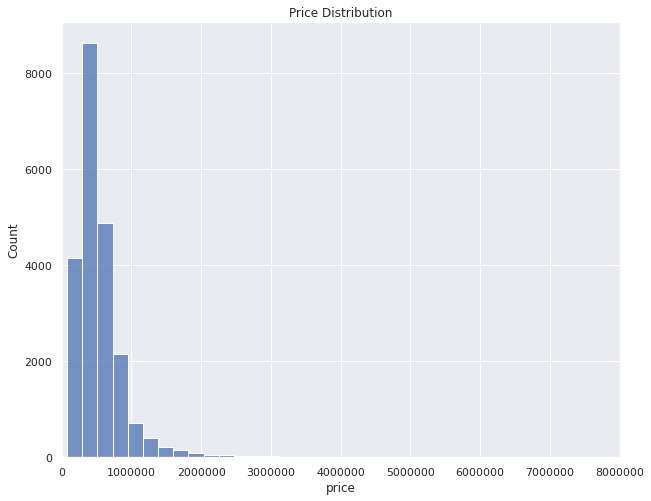

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Price Distribution")
ax.ticklabel_format(useOffset=False,style='plain')
ax.set_xlim([0,8_000_000])
print("Mean value for price: "+str(hs.price.mean()))
sns.histplot(hs['price'], bins=35);

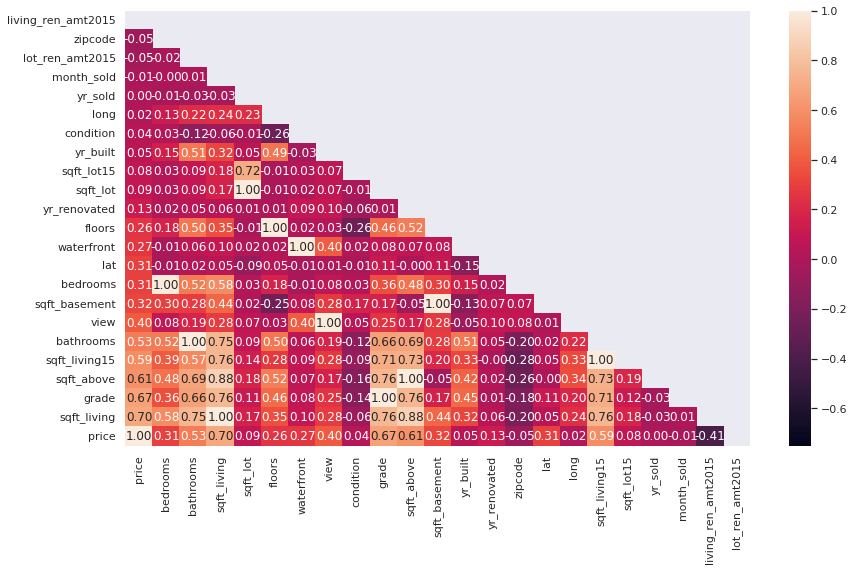

In [130]:
fig, ax = plt.subplots(figsize=(14,8))
corr = hs.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr.sort_values(by=["price"]),mask=mask,annot=True, fmt = '.2f', vmin=-0.75, vmax=1);

Conclusion of this heatmap is that price (target column) is highly positive correlated with:-
*  #bathrooms (relatively not much high)
* sqft_living
* grade
* sqft_above
* sqft_living15 (relatively not much high)
<br>
Also, price has negative correlation with:-
* living_ren_amt2015
<br>

We also could find out that **sqft_lot** is not much affecting the price as we thought before.

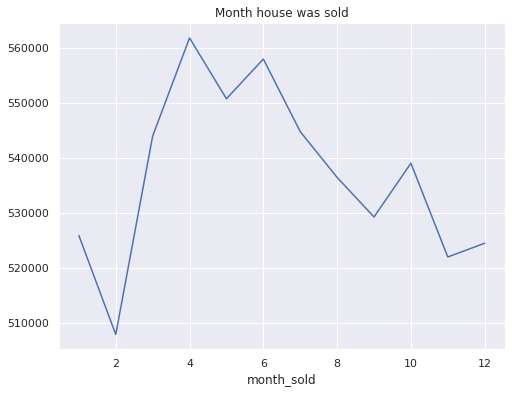

In [94]:
plt.figure(figsize=(8,6))
plt.title("Month house was sold")
hs.groupby('month_sold').mean()['price'].plot();

From previous figure, at April and June, prices are the highest

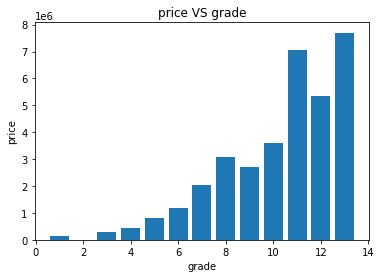

In [ ]:
plt.title("price VS grade")
plt.xlabel("grade")
plt.ylabel("price")
plt.bar(hs["grade"], hs["price"]);

We found from the previous bar plot that the **grade** column alone is not much helpful for the prediction, even if it has a high positive correlation

Houses having grade = 12, is making some strange behaviour. But, from the graph just below it, it shows that the house having price = 7 million is can be considered as an outlier as it is the only value having this value (from the left plot)


---
High grade means high price


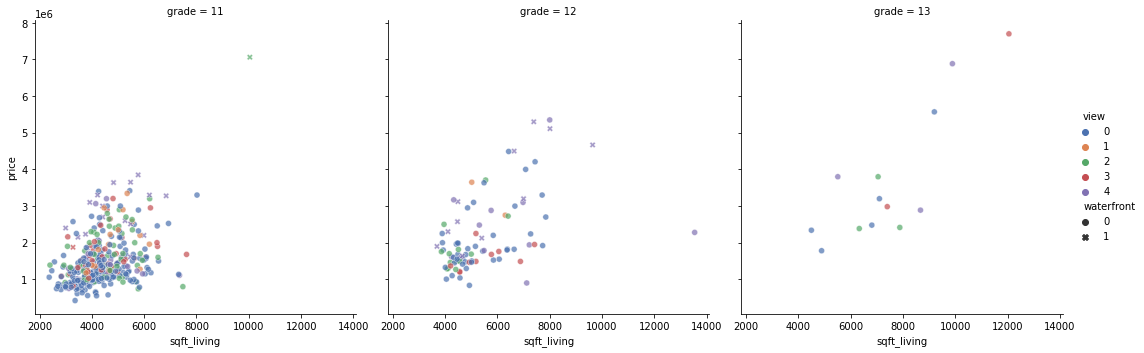

In [58]:
# Getting houses having grades above or equal 11
grade_from_11_to_13 = hs[hs['grade']>=11]

# Plotting Price vs Sqft living for various grades and other parameters
sns.relplot(data=grade_from_11_to_13,x='sqft_living', y='price',hue='view', col='grade',style='waterfront',kind='scatter', palette='deep',alpha=0.7);

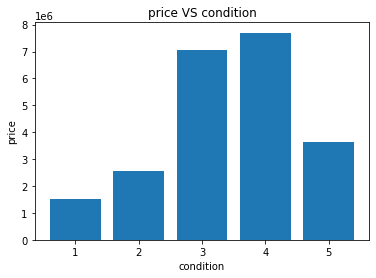

In [59]:
plt.title("price VS condition")
plt.xlabel("condition")
plt.ylabel("price")
plt.bar(hs["condition"], hs['price']);

Now, We found from the previous bar plot that the **condition** column has a high positive correlation with price (high condition means high price) but with strange behaviuor at condition number 5

From the next figure we could find that the strange behaviour is because houses with condition equals 3,4 have more views and sqft living than those with condition=5


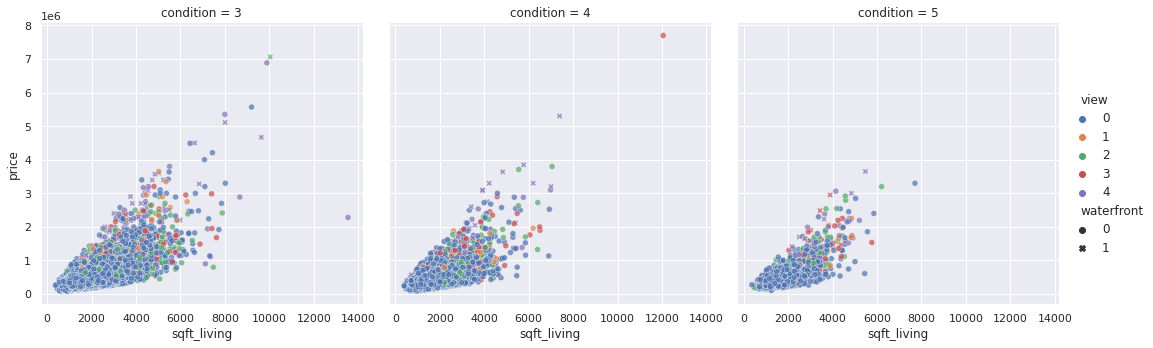

In [75]:
# Getting houses having condition greater than or equal 3
condition_3_5 = hs[hs['condition']>=3]
# Plotting Price vs Sqft living for various conditions and other parameters
sns.relplot(data=condition_3_5,x='sqft_living', y='price',hue='view', col='condition',style='waterfront',kind='scatter', palette='deep',alpha=0.7);


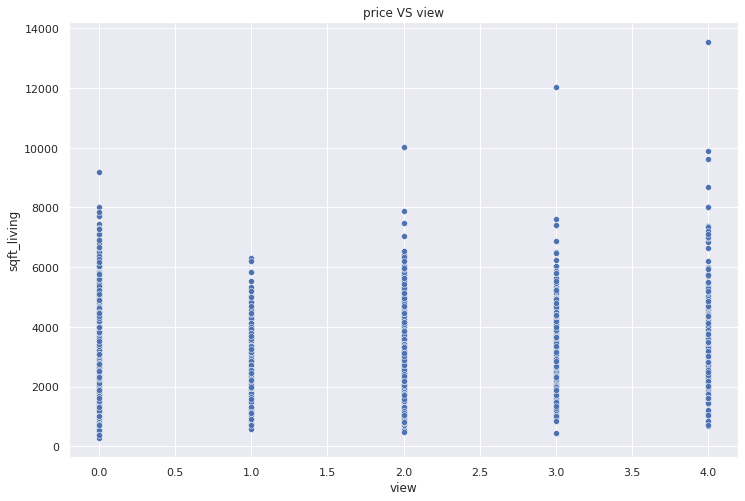

In [78]:
plt.title("price VS view")
sns.scatterplot(data=hs, x='view',y='sqft_living');

From previous figure we find that the 'view' column has relatively no effect on the target column

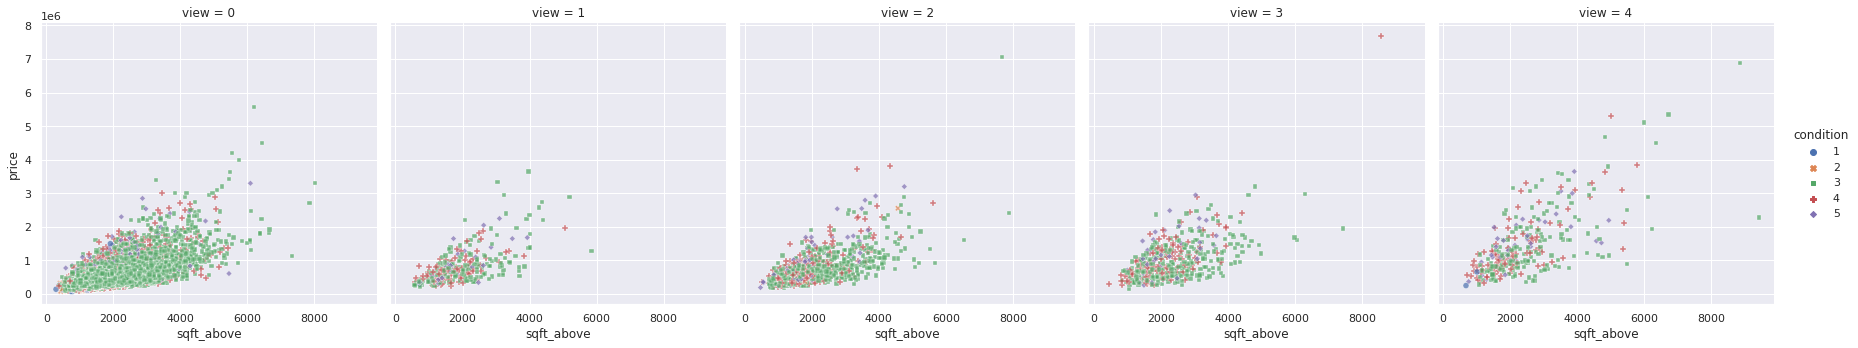

In [82]:
# Plotting price vs sqft living
sns.relplot(data=hs, x="sqft_above", y="price", col="view", hue="condition", style="condition",kind="scatter", legend="full",palette='deep',alpha=0.7);

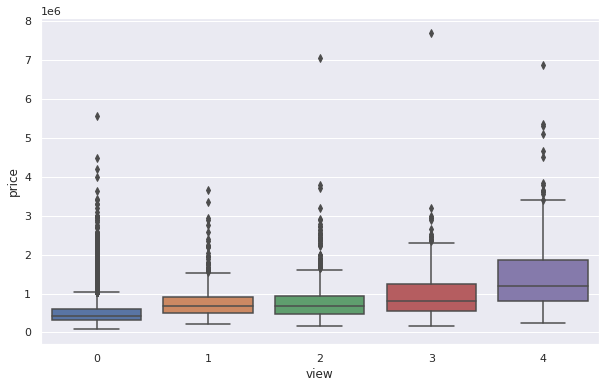

In [96]:
fig, ax = plt.subplots(1, 1,figsize=(10,6))
sns.boxplot(x=hs['view'],y=hs['price'], ax=ax);

From this previous figure, we could find out that the view is almost affecting the price. But, we can conclude that higher numbers means good view with slight increase in price

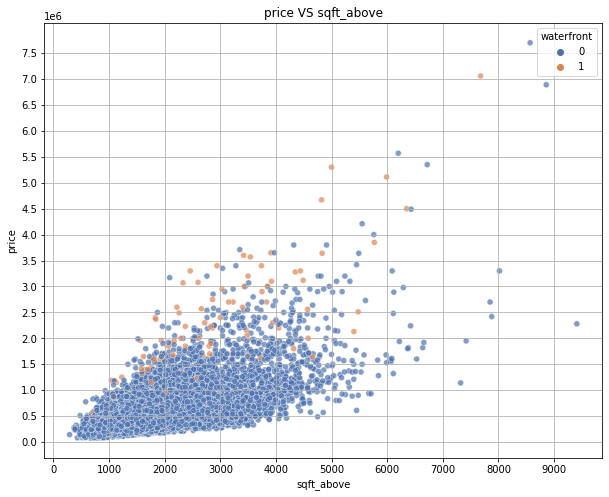

In [ ]:
plt.figure(figsize=(10,8))
plt.title("price VS sqft_above")
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.grid(True)
plt.xticks(np.arange(0,10_000, 1000))
plt.yticks(np.arange(0,8_000_000, 500_000))
# colors = hs.price >= 4_500_000 # The mean value of the price
# colors = colors.replace({True: ">4500K", False: "<4500K"})

sns.scatterplot(x="sqft_above", y="price", data=hs,hue='waterfront',legend="full",sizes=(10, 200),alpha=0.7, palette="deep");

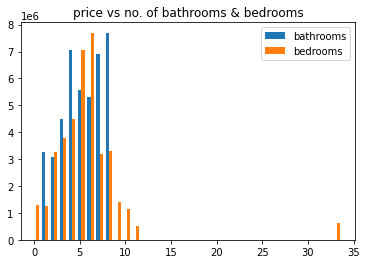

In [ ]:
plt.title("price vs no. of bathrooms & bedrooms")
ba=plt.bar(hs["bathrooms"],hs["price"],width=0.35)
bed=plt.bar(hs["bedrooms"]+0.35,hs["price"],width=0.35)
plt.legend((ba,bed),("bathrooms","bedrooms"))


In [ ]:
#drop the columns w/ low correlation value w/ price
hs.drop("zipcode",axis=1) #corr=-0.05

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,yr_sold,living_ren_amt2015,lot_ren_amt2015
0,7129300520,2014-10-13,221900.0,3,1,1180,1,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,"(-122.257, 47.5112)",2014,160,0
1,6414100192,2014-12-09,538000.0,3,2,2570,2,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,"(-122.319, 47.721)",2014,-880,397
2,5631500400,2015-02-25,180000.0,2,1,770,1,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,"(-122.233, 47.7379)",2015,1950,-1938
3,2487200875,2014-12-09,604000.0,4,3,1960,1,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,"(-122.393, 47.5208)",2014,-600,0
4,1954400510,2015-02-18,510000.0,3,2,1680,1,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,"(-122.045, 47.6168)",2015,120,-577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,3,0,0,3,...,0,98103,47.6993,-122.346,1530,1509,"(-122.346, 47.6993)",2014,0,378
21609,6600060120,2015-02-23,400000.0,4,2,2310,2,0,0,3,...,0,98146,47.5107,-122.362,1830,7200,"(-122.362, 47.5107)",2015,-480,1387
21610,1523300141,2014-06-23,402101.0,2,1,1020,2,0,0,3,...,0,98144,47.5944,-122.299,1020,2007,"(-122.299, 47.5944)",2014,0,657
21611,291310100,2015-01-16,400000.0,3,2,1600,2,0,0,3,...,0,98027,47.5345,-122.069,1410,1287,"(-122.069, 47.5345)",2015,-190,-1101


**The house with 33 bedroom is considered an outlier**

### Investigating taking years sample from 1940 and 1960 that includes the max value

In [ ]:
print(hs[hs['yr_renovated']!=0]['price'].mean())
print(hs[hs['yr_renovated']==0]['price'].mean())

760628.7778993435
530447.9585970336


In [ ]:
# year_df = hs[(hs["yr_built"]>=1940) & (hs["yr_built"]<=1960)]
# plt.figure(figsize=(8,6))
# plt.bar(year_df['yr_built'], year_df['price'])
# ren_house = year_df[(year_df['yr_built']==1940) & (year_df["yr_renovated"]!= 0)]
# nonren_house = year_df[(year_df['yr_built']==1940) & (year_df["yr_renovated"]== 0)]

In [ ]:
# plt.bar(ren_house["yr_built"], ren_house["price"], width=0.2)
# plt.bar(nonren_house["yr_built"]+0.2, nonren_house["price"], width=0.2)

From next two graphs, houses from lat=47.3 to lat=47.78 and long=-122.5 to long=-122.1 are laying on waterfront

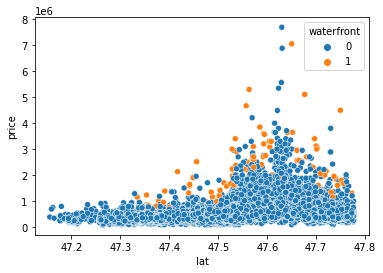

In [ ]:
plt.title("price vs latitude")
sns.scatterplot(x="lat",y="price",data=hs, hue='waterfront')

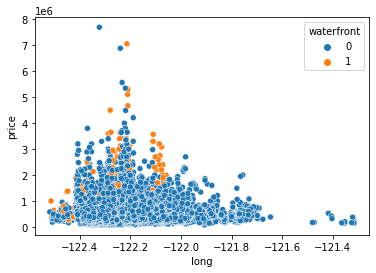

In [ ]:
plt.title("price vs longitude")
sns.scatterplot(x="long",y="price",data=hs, hue='waterfront')

#### Checking outliers
Note: no action has been performed yet.

In [ ]:
from numpy.lib.function_base import quantile
def outlier(column):
  iqr = column.quantile(q=0.75)-column.quantile(q=0.25)
  lwr = column.quantile(q=0.75)-(1.5*iqr)
  hir = column.quantile(q=0.75)+(1.5*iqr)
  return (lwr,hir)

out = hs['price'].agg(outlier)
print(out)

price_outliar = hs[(hs['price']<out[0]) | (hs['price']>out[1])]
price_outliar

# l = (hs.columns[2:]).remove('location')
# temp_dict = {}
# for col in l:
#   temp_dict[col] = hs[col].agg(outlier)

# temp_dict

(160425.0, 1129575.0)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,20150311T000000,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,20140612T000000,1325000.0,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
92,4168000060,20150226T000000,153000.0,3,1.00,1200,10500,1.0,0,0,...,7,1200,0,1962,0,98023,47.3220,-122.351,1350,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,20150130T000000,1700000.0,4,3.50,3830,8963,2.0,0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777
21576,9253900271,20150107T000000,3567000.0,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21590,7430200100,20140514T000000,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125


# Viewing geographic location of houses:

**Location of houses is around (47.15,-122.519)** in US,Washington State, Seattle

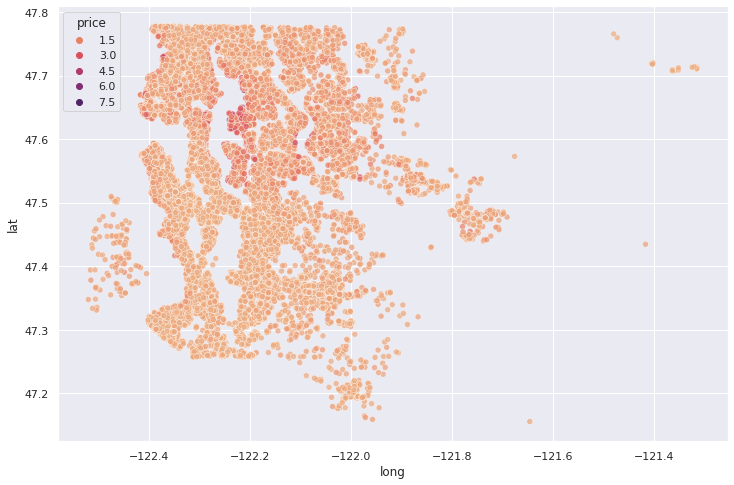

In [109]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=hs,hue='price', palette='flare', alpha=0.7);

In [ ]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Office\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

In [ ]:
print(min(hs['lat']), max(hs['lat']))
print(min(hs['long']), max(hs['long']))

-122.519 -121.315


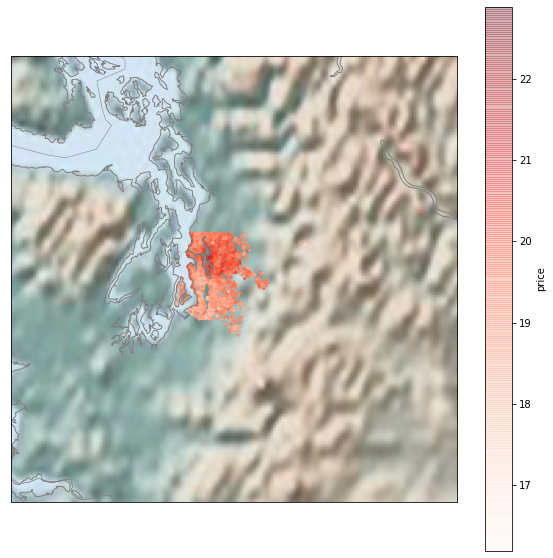

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(10, 10))

#m = Basemap(projection='cyl', resolution='h',llcrnrlat=-90, urcrnrlat=90,llcrnrlon=-180, urcrnrlon=180,)
m=Basemap(projection='lcc',resolution='h',lat_0=47.5,lon_0=-122,width=0.3E6,height=0.3E6)

m.shadedrelief(scale=2)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')


# draw_map(m)

# 2. scatter house data, with color reflecting prices
# and size reflecting square footage of living
m.scatter(hs["long"], hs["lat"], latlon=True,
          c=np.log2(hs["price"]), s=np.log10(hs["sqft_living"]),
        cmap='Reds', alpha=0.3, marker='o')

# 3. create colorbar and legend
plt.colorbar(label=r'price')
#plt.clim(3, 7)